# <div style="color:#232F3E;display:fill;border-radius:5px;background-color:#CC6C6C;letter-spacing:0.1px;overflow:hidden"><p style="padding:20px;color:#232F3E;overflow:hidden;margin:0;font-size:100%;text-align:center">Face Emotion Recognition</p></div>

<div align='center' style="font-size:1.5rem;font-family: 'Garamond';"><b> CS-5710 Machine Learning</b> <br>
<i>Instructor: Dr. Muhammad Zubair Khan<br></div>
   <hr>
    

## [**Source Code on GitHub**](https://github.com/kinggovind/Final-Project) 

### Contributors

* **Name**: Govind Tatiyal         
    * **Student ID**: 700733003
* **Name**: Sachin Beniwal
    * **Student ID**: 700741814
* **Name**: Sri Ram Nimmalapudi 
    * **Student ID**: 700740239
* **Name**: Venkataguruswamy Godha 
    * **Student ID**: 700740474
    

# <div style="color:#232F3E;display:fill;border-radius:5px;background-color:#CC6C6C;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:#232F3E;overflow:hidden;margin:0;font-size:110%"><b>1 |</b>  Importing Libraries</p></div>

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import skimage.feature
import scikitplot as skplt
from termcolor import colored
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score, classification_report,confusion_matrix


plt.rcParams['figure.dpi'] = 150
plt.rcParams["figure.figsize"] = (10,5)
colors=sns.color_palette('Set3')
sns.set(rc={
    'axes.facecolor':'#FFFFFF', 
    'figure.facecolor':'#FFFFFF',
    'font.sans-serif':'Arial',
    'font.family':'sans-serif'
})

import warnings
warnings.filterwarnings("ignore")

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# <div style="color:#232F3E;display:fill;border-radius:5px;background-color:#CC6C6C;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:#232F3E;overflow:hidden;margin:0;font-size:110%"><b>2 |</b>  Data Loading, Preparation, and Visualization</p></div>

There are 7 different emotions
       happy   sad  fear  surprise  neutral  angry  disgust
train   7215  4830  4097      3171     4965   3995      436


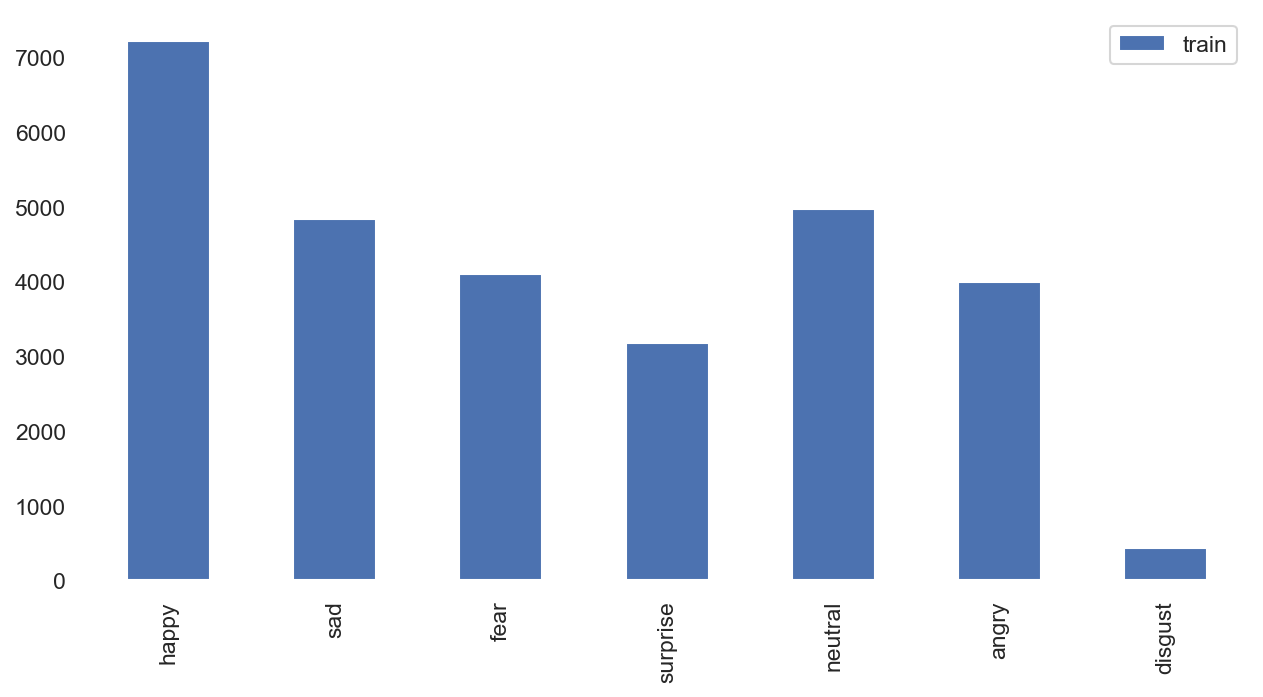

      happy   sad  fear  surprise  neutral  angry  disgust
test   1774  1247  1024       831     1233    958      111


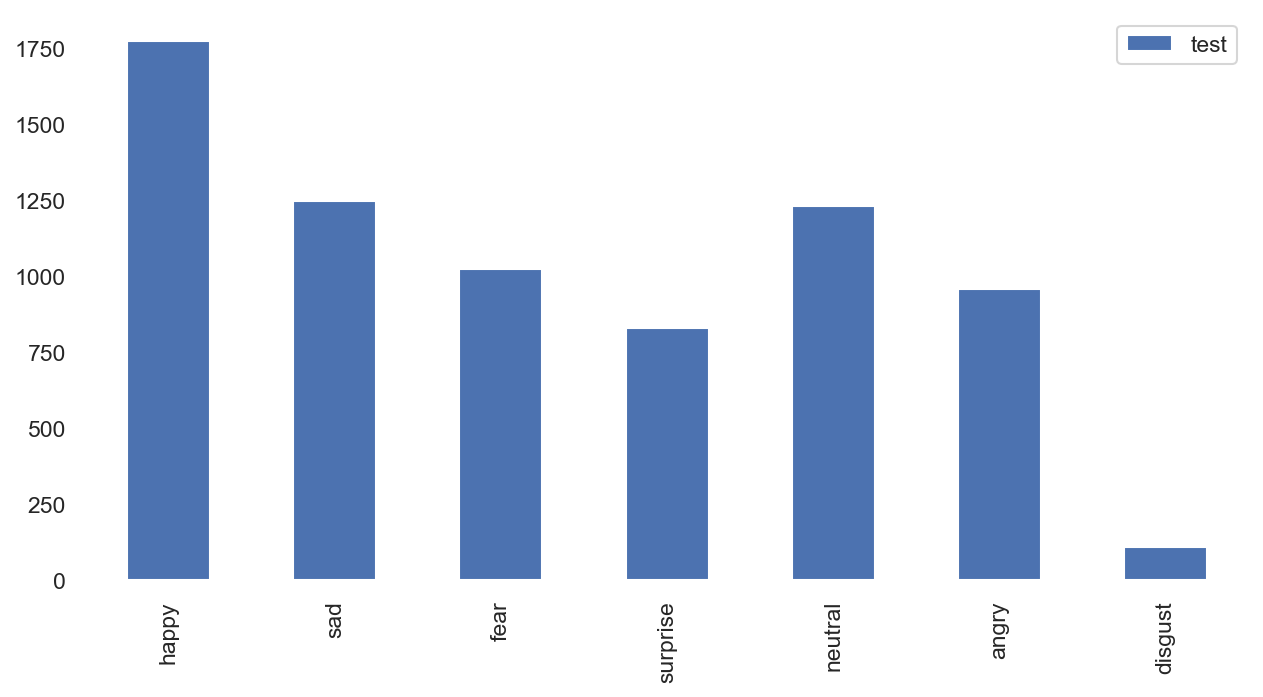

For train data, there are 23774 images.
The number of surprise images: 6220
The number of fear images: 3956
The number of angry images: 3372
The number of neutral images: 2616
The number of sad images: 4076
The number of disgust images: 3195
The number of happy images: 339
The shape of image: (48, 48)




For test data, there are 5969 images.
The number of surprise images: 1537
The number of fear images: 1023
The number of angry images: 854
The number of neutral images: 673
The number of sad images: 1016
The number of disgust images: 771
The number of happy images: 95


In [2]:
root_path = "FER/"
train_dir = "train/"
test_dir = "test/"

train_path = os.path.join(root_path, "train")
test_path = os.path.join(root_path, "test")

emotion_list = os.listdir(train_path)
print(
    colored("There are","blue",attrs=["bold"]),
    colored("{}".format(len(emotion_list)),"red",attrs=["bold"]),
    colored("different emotions","blue",attrs=["bold"])
)
        
row, col = 48, 48
classes = 7

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path +"/"+ expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df
train_count = count_exp(train_dir, 'train')
test_count = count_exp(test_dir, 'test')
print(train_count)

train_count.transpose().plot(kind="bar")
plt.savefig('train_count.png', bbox_inches='tight')
plt.show()

print(test_count)
test_count.transpose().plot(kind="bar")
plt.savefig('test_count.png', bbox_inches='tight')
plt.show()

# save the images and lables
# [0:'surprise', 1:'fear', 2:'angry', 3:'neutral', 4:'sad', 5:'disgust', 6:'happy']

train_imgs = []
train_imgs_lbp = []
train_lables = []

for i in range(len(emotion_list)) :
    emotion_path = os.path.join(train_path, emotion_list[i])
    for img_name in os.listdir(emotion_path):
        img = plt.imread(os.path.join(emotion_path, img_name))
        img_lbp = skimage.feature.local_binary_pattern(img, 8, 1.0, method='var')
        if np.isnan(img_lbp).sum() == 0:
            train_imgs.append(img)
            train_imgs_lbp.append(img_lbp)
            train_lables.append(i)

test_imgs = []
test_imgs_lbp = []
test_lables = []

for i in range(len(emotion_list)) :
    emotion_path = os.path.join(test_path, emotion_list[i])
    for img_name in os.listdir(emotion_path):
        img = plt.imread(os.path.join(emotion_path, img_name))
        img_lbp = skimage.feature.local_binary_pattern(img, 8, 1.0, method='var')
        if np.isnan(img_lbp).sum() == 0:
            test_imgs.append(img)
            test_imgs_lbp.append(img_lbp)
            test_lables.append(i)
            
            
print("For train data, there are {} images.".format(len(train_lables)))
print("The number of surprise images: {}".format(train_lables.count(0)))
print("The number of fear images: {}".format(train_lables.count(1)))
print("The number of angry images: {}".format(train_lables.count(2)))
print("The number of neutral images: {}".format(train_lables.count(3)))
print("The number of sad images: {}".format(train_lables.count(4)))
print("The number of disgust images: {}".format(train_lables.count(5)))
print("The number of happy images: {}".format(train_lables.count(6)))
print("The shape of image: {}".format(train_imgs[0].shape))
print("\n")
print("\n")
print("For test data, there are {} images.".format(len(test_lables)))
print("The number of surprise images: {}".format(test_lables.count(0)))
print("The number of fear images: {}".format(test_lables.count(1)))
print("The number of angry images: {}".format(test_lables.count(2)))
print("The number of neutral images: {}".format(test_lables.count(3)))
print("The number of sad images: {}".format(test_lables.count(4)))
print("The number of disgust images: {}".format(test_lables.count(5)))
print("The number of happy images: {}".format(test_lables.count(6)))

# <div style="color:#232F3E;display:fill;border-radius:5px;background-color:#CC6C6C;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:#232F3E;overflow:hidden;margin:0;font-size:110%"><b>3 |</b>  Instance of an Single Image</p></div>

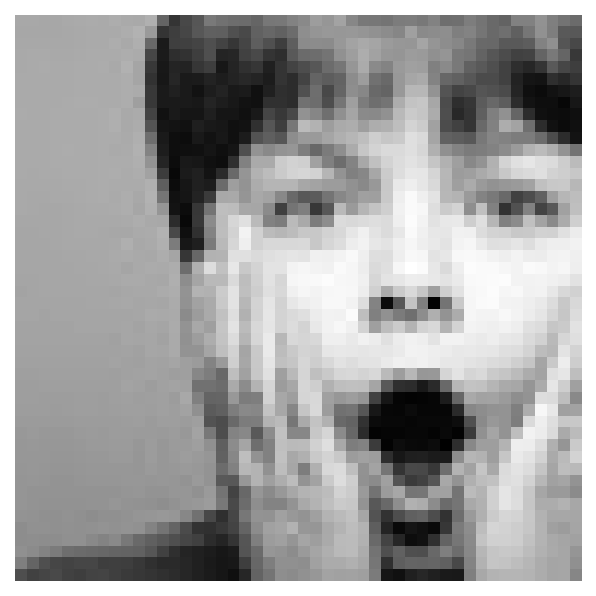

In [3]:
train_surprise_path = os.path.join(train_path, "surprise")
img_example_name = os.listdir(train_surprise_path)[0]
img_example = plt.imread(os.path.join(train_surprise_path, img_example_name))
plt.imshow(img_example, cmap='gray')
plt.axis("off")
plt.savefig('single.png', bbox_inches='tight')
plt.show()

# <div style="color:#232F3E;display:fill;border-radius:5px;background-color:#CC6C6C;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:#232F3E;overflow:hidden;margin:0;font-size:110%"><b>4 |</b>  Instance of All Category Images</p></div>

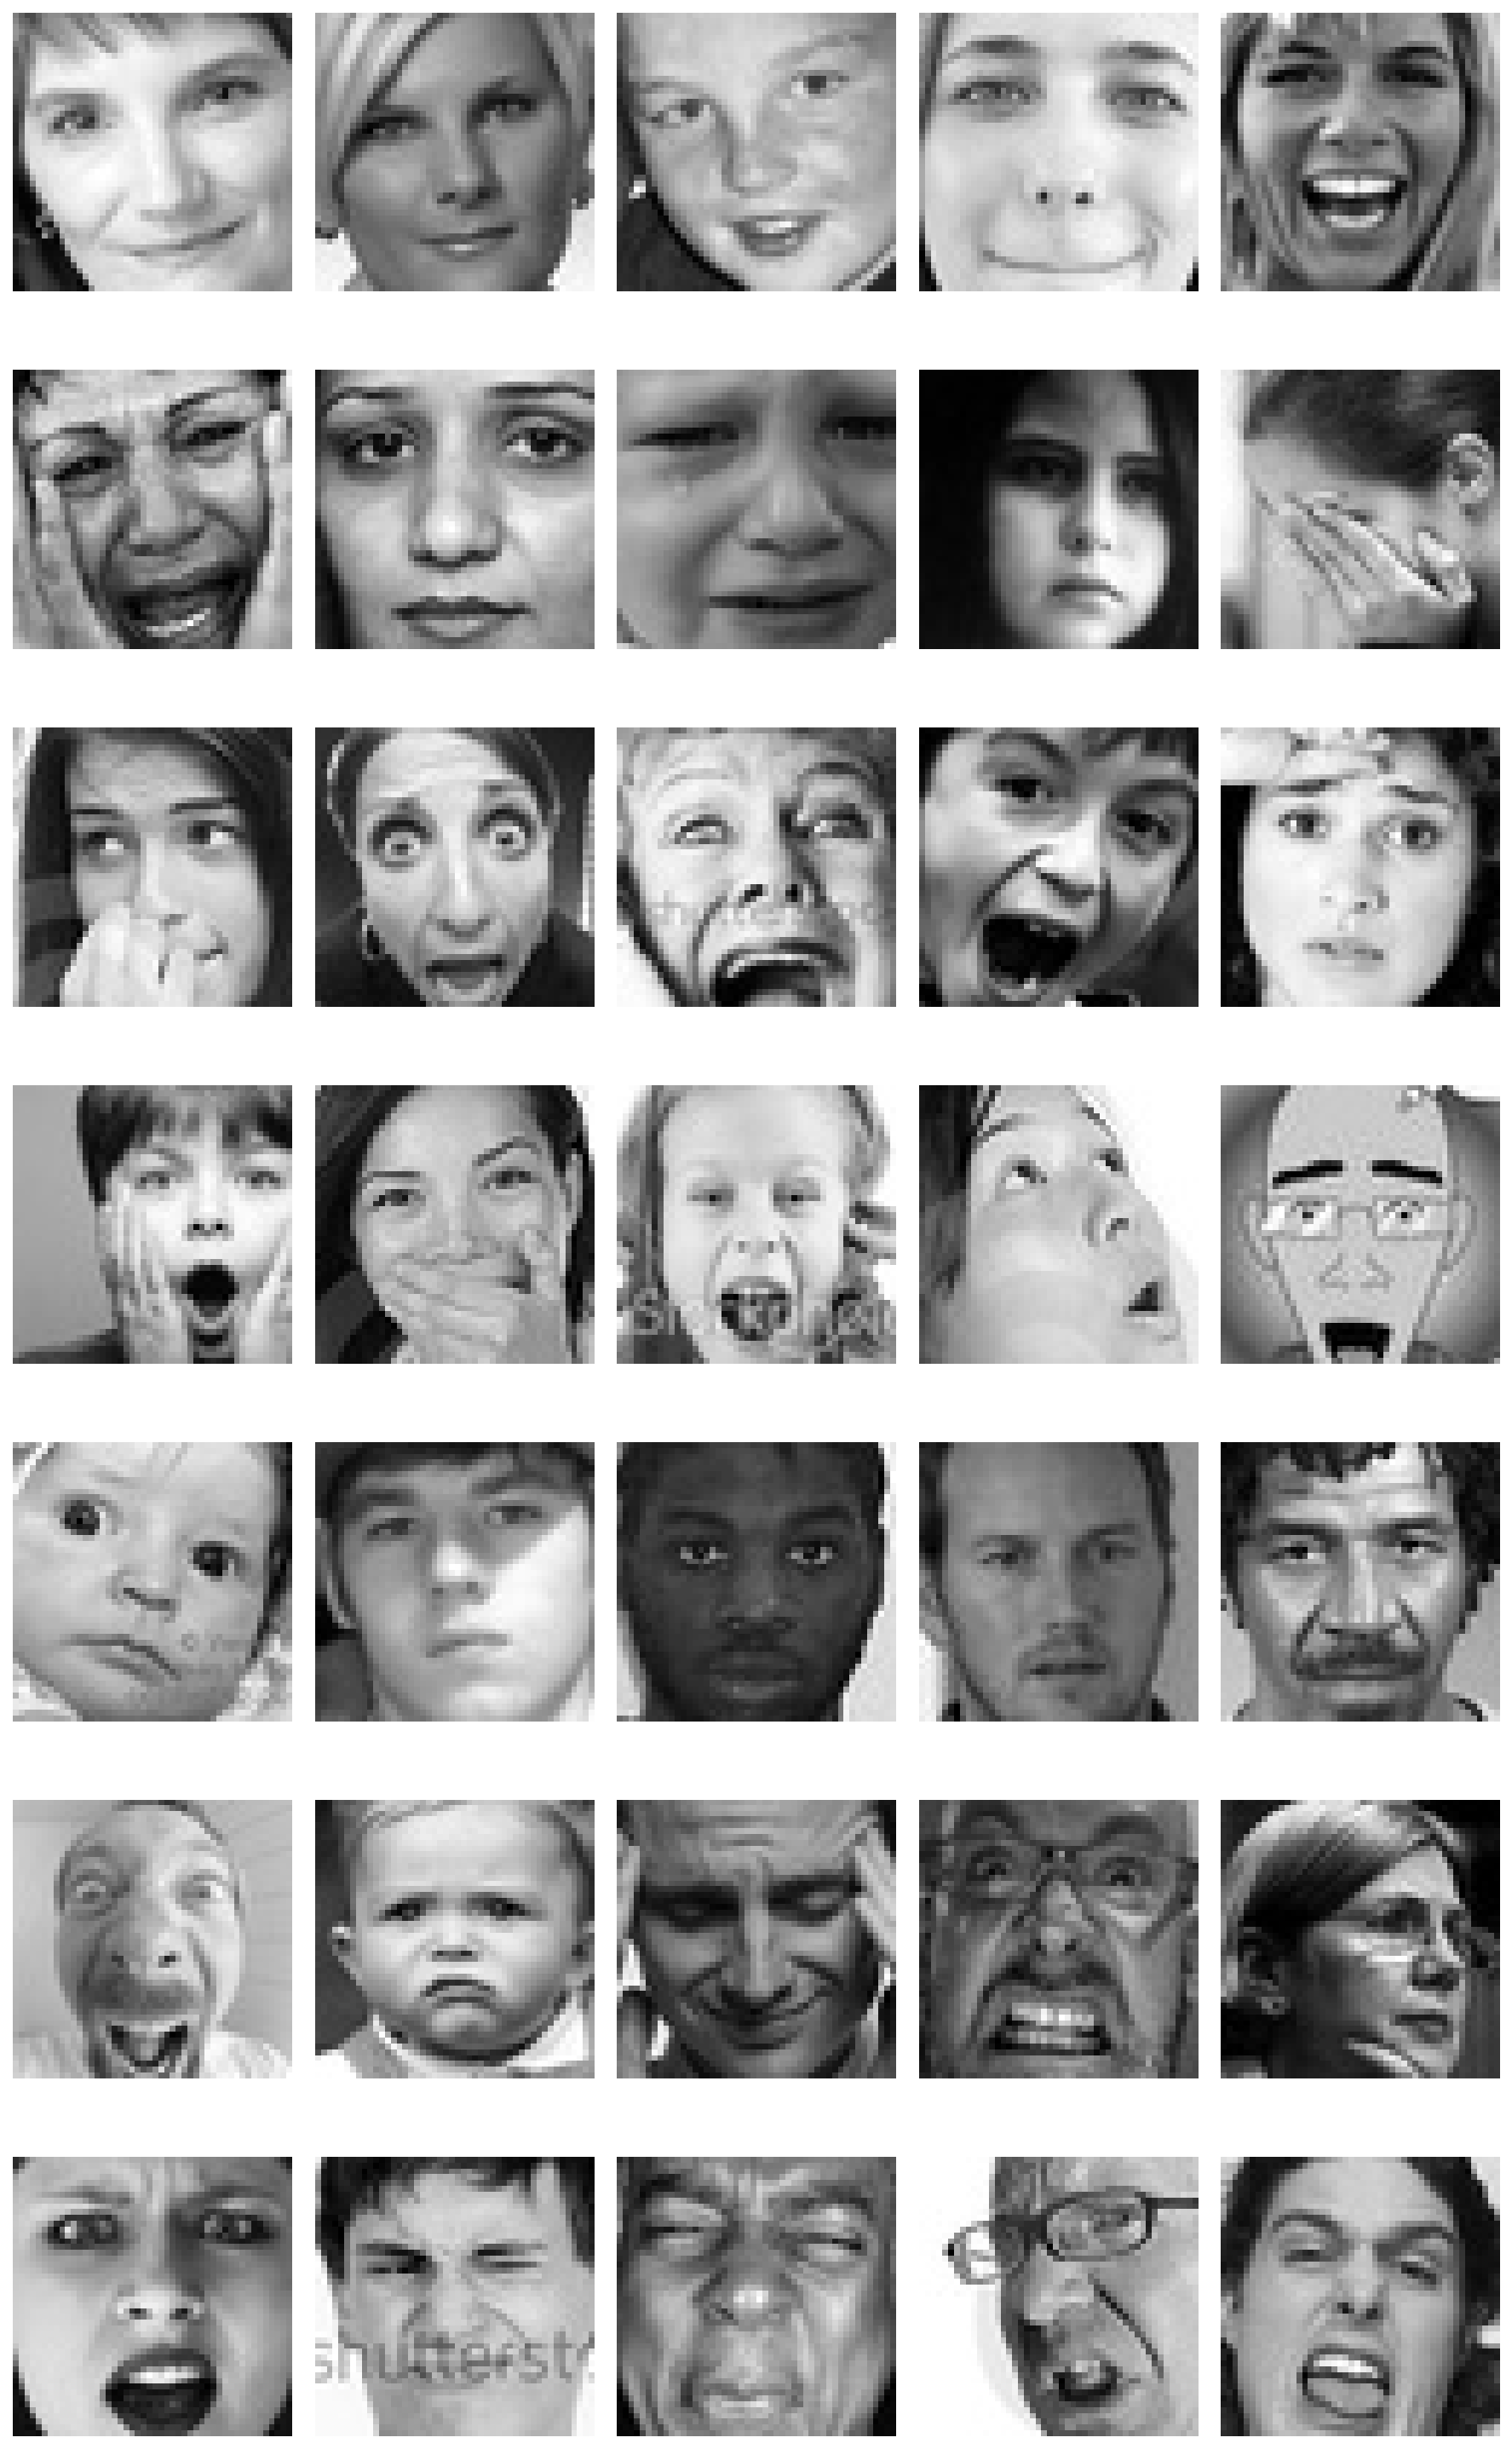

In [4]:
plt.figure(0, figsize=(12, 20))
fig_no = 0

for emotion in emotion_list:
    emotion_path = os.path.join(train_path, emotion)
    for i in range(5):
        fig_no += 1
        plt.subplot(7, 5, fig_no)
        img = plt.imread(os.path.join(emotion_path, os.listdir(emotion_path)[i]))
        plt.imshow(img, cmap="gray")
        plt.axis("off")
plt.tight_layout()
plt.savefig('all.png', bbox_inches='tight')
plt.show()

# <div style="color:#232F3E;display:fill;border-radius:5px;background-color:#CC6C6C;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:#232F3E;overflow:hidden;margin:0;font-size:110%"><b>5 |</b>  Local Binary Pattern</p></div>

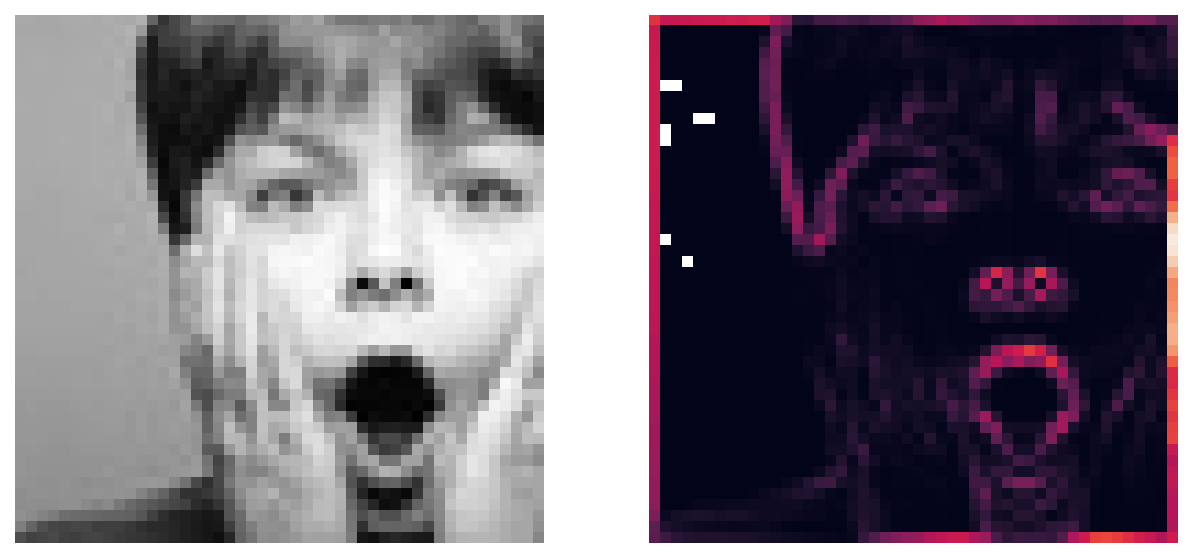

In [5]:
img_example_lbp = skimage.feature.local_binary_pattern(img_example, 8, 1.0, method='var')
plt.subplot(121)
plt.imshow(img_example, cmap ='gray')
plt.axis("off")
plt.subplot(122)
plt.imshow(img_example_lbp)
plt.axis("off")
plt.savefig('lbp.png', bbox_inches='tight')
plt.show()

# <div style="color:#232F3E;display:fill;border-radius:5px;background-color:#CC6C6C;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:#232F3E;overflow:hidden;margin:0;font-size:110%"><b>6 |</b>  Data Preprocessing</p></div>

In [6]:
qt = QuantileTransformer()

train_imgs_lbp_np = np.array(train_imgs_lbp)
X_train = np.reshape(train_imgs_lbp_np, (train_imgs_lbp_np.shape[0], -1))
X_train = qt.fit_transform(X_train)
y_train = np.array(train_lables)

test_imgs_lbp_np = np.array(test_imgs_lbp)
X_test = np.reshape(test_imgs_lbp_np, (test_imgs_lbp_np.shape[0], -1))
X_test = qt.transform(X_test)
y_test = np.array(test_lables)

# <div style="color:#232F3E;display:fill;border-radius:5px;background-color:#CC6C6C;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:#232F3E;overflow:hidden;margin:0;font-size:110%"><b>7 |</b>  Logistic Regression</p></div>

In [7]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
y_pred_lr = logistic_regression_model.predict(X_test)
y_pred_proba_lr = logistic_regression_model.predict_proba(X_test)
print(f'\n\033[1;30;34m Training Accuracy   : \033[0;0m {(logistic_regression_model.score(X_train, y_train)*100).round(2)}%')
print(f'\033[1;30;34m Testing Accuracy    : \033[0;0m {(logistic_regression_model.score(X_test, y_test)*100).round(2)}%')


 Training Accuracy   :  45.11%
 Testing Accuracy    :  38.58%


In [8]:
classificationReportLR = classification_report(y_test,  y_pred_lr)
print(classificationReportLR)

              precision    recall  f1-score   support

           0       0.48      0.66      0.55      1537
           1       0.30      0.24      0.27      1023
           2       0.27      0.21      0.24       854
           3       0.49      0.44      0.46       673
           4       0.35      0.38      0.36      1016
           5       0.28      0.22      0.25       771
           6       0.32      0.09      0.15        95

    accuracy                           0.39      5969
   macro avg       0.36      0.32      0.33      5969
weighted avg       0.37      0.39      0.37      5969



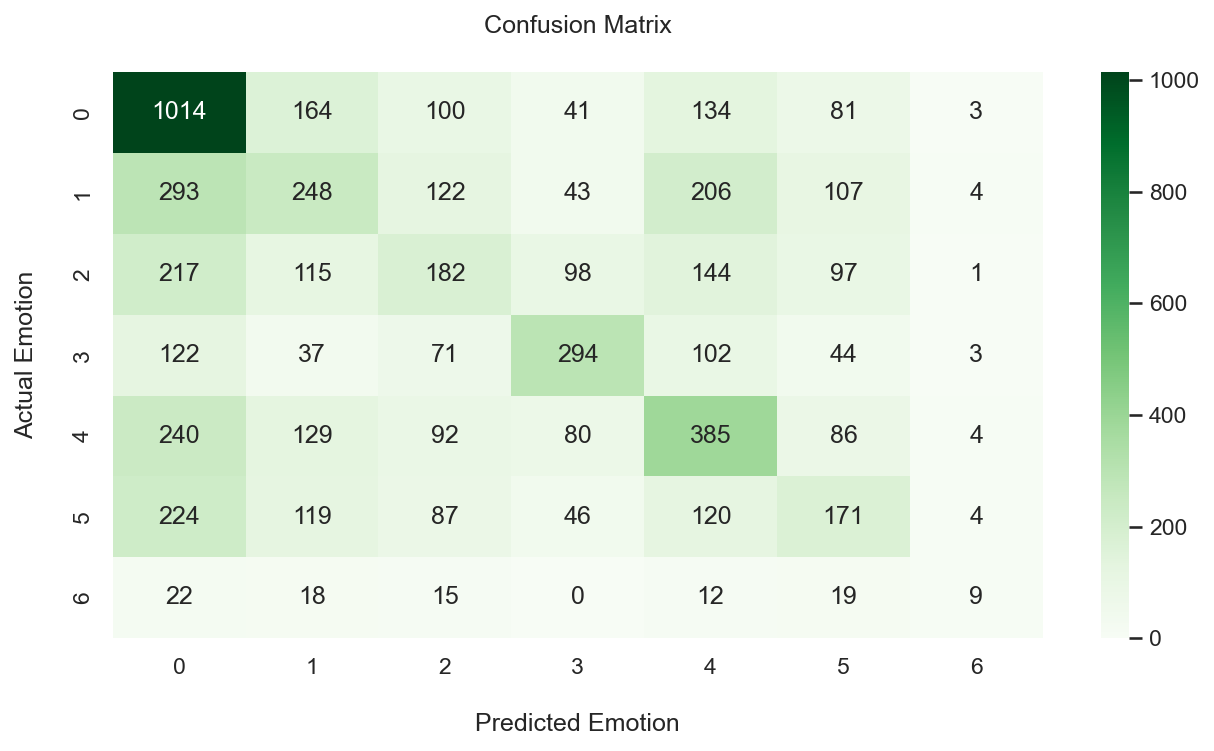

In [9]:
cf_matrix_Logistic_Regression = confusion_matrix(y_test, y_pred_lr)
ax = sns.heatmap(cf_matrix_Logistic_Regression, annot=True, fmt=".0f", cmap='Greens')
ax.set_title('Confusion Matrix\n')
ax.set_xlabel('\nPredicted Emotion')
ax.set_ylabel('Actual Emotion\n')
plt.savefig('lr_cf.png', bbox_inches='tight')
plt.show()

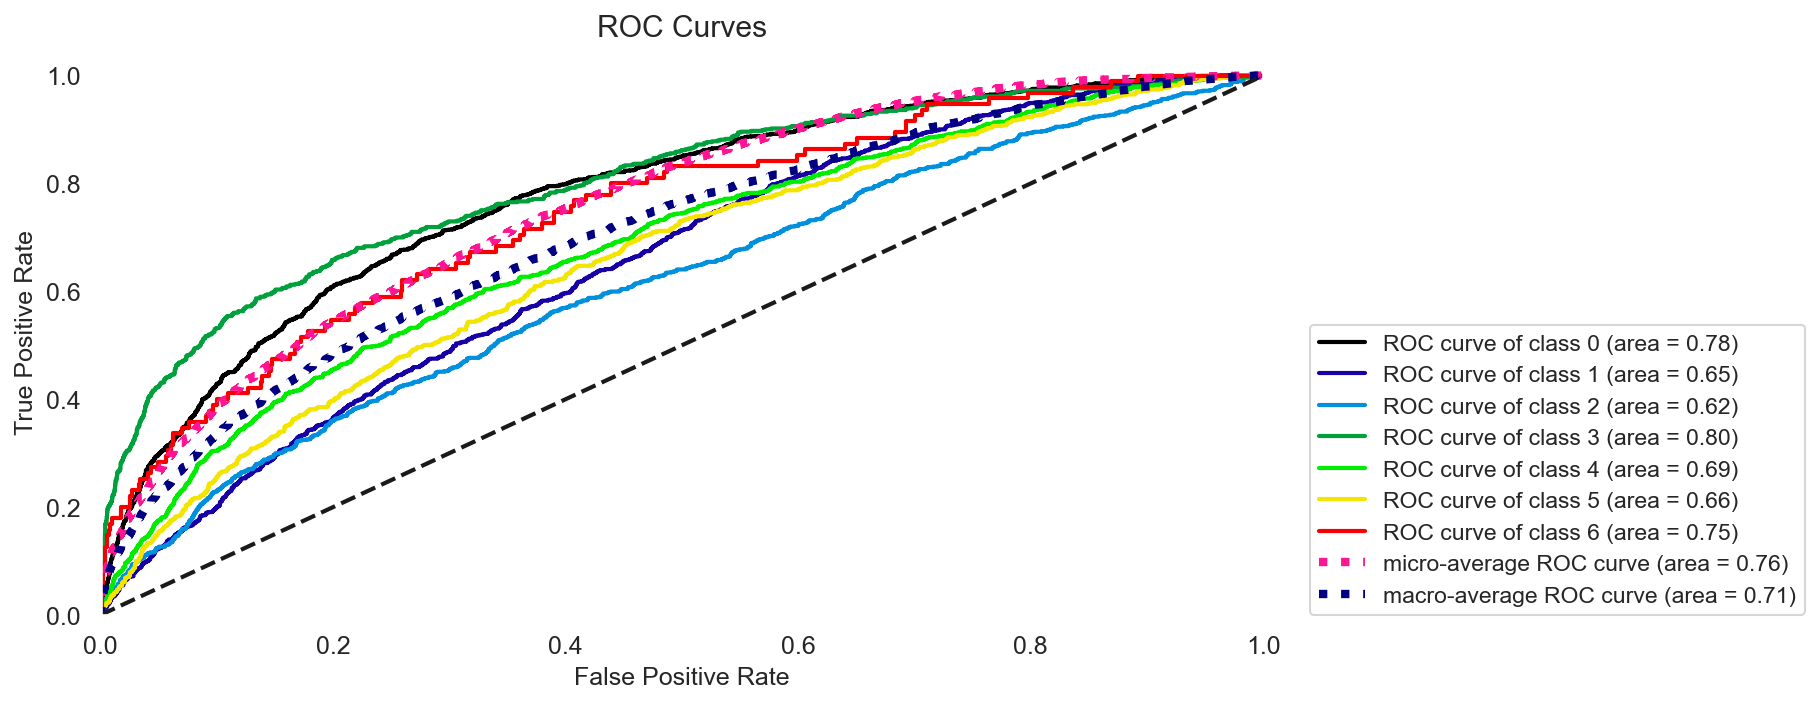

In [10]:
logistic_regression_roc_score = roc_auc_score(y_test, y_pred_proba_lr,multi_class='ovr').astype(float)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba_lr)
plt.legend(loc=(1.04,0))
plt.savefig('roc_lr.png', bbox_inches='tight')
plt.show()

# <div style="color:#232F3E;display:fill;border-radius:5px;background-color:#CC6C6C;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:#232F3E;overflow:hidden;margin:0;font-size:110%"><b>8 |</b>  K-Nearest Neighbor Classifier</p></div>

In [11]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
preds_knn = knn.predict(X_test)
proba_valid_knn = knn.predict_proba(X_test)
print(f'\n\033[1;30;34m Training Accuracy   : \033[0;0m {(knn.score(X_train, y_train)*100).round(2)}%')
print(f'\033[1;30;34m Testing Accuracy    : \033[0;0m {(knn.score(X_test, y_test)*100).round(2)}%')


 Training Accuracy   :  72.73%
 Testing Accuracy    :  40.98%


In [12]:
classificationReportKNN = classification_report(y_test,  y_pred_lr)
print(classificationReportKNN)

              precision    recall  f1-score   support

           0       0.48      0.66      0.55      1537
           1       0.30      0.24      0.27      1023
           2       0.27      0.21      0.24       854
           3       0.49      0.44      0.46       673
           4       0.35      0.38      0.36      1016
           5       0.28      0.22      0.25       771
           6       0.32      0.09      0.15        95

    accuracy                           0.39      5969
   macro avg       0.36      0.32      0.33      5969
weighted avg       0.37      0.39      0.37      5969



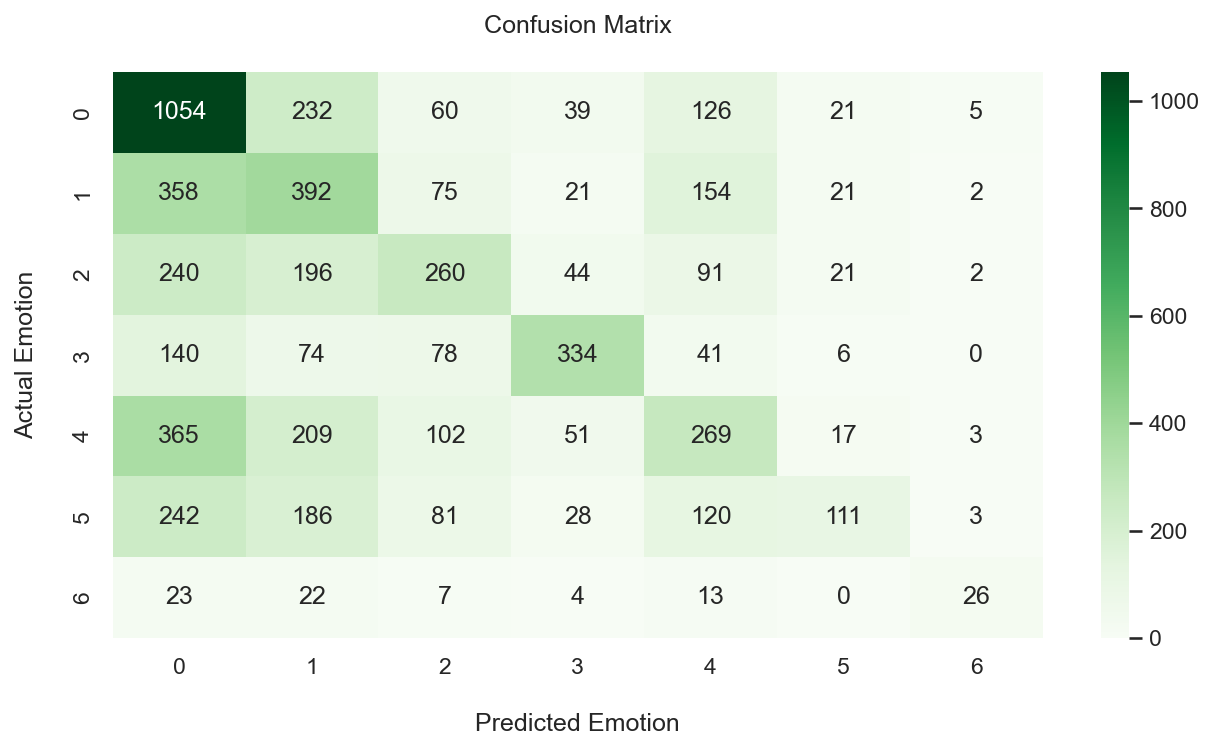

In [13]:
cf_matrix_KNN = confusion_matrix(y_test, preds_knn)
ax = sns.heatmap(cf_matrix_KNN, annot=True, fmt=".0f", cmap='Greens')
ax.set_title('Confusion Matrix\n')
ax.set_xlabel('\nPredicted Emotion')
ax.set_ylabel('Actual Emotion\n')
plt.savefig('knn_cf.png', bbox_inches='tight')
plt.show()

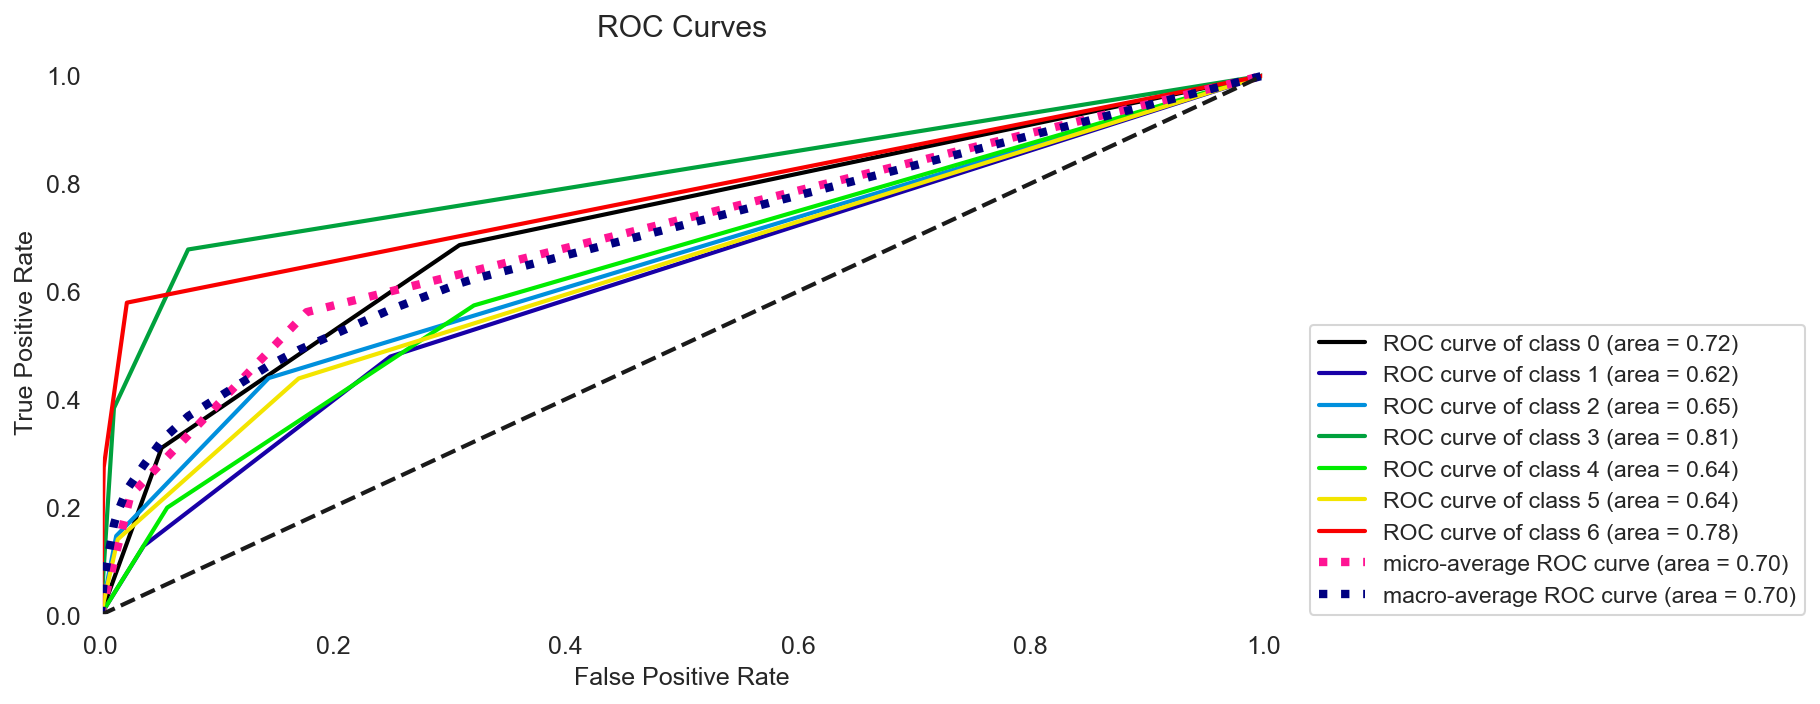

In [14]:
knn_roc_score = roc_auc_score(y_test, proba_valid_knn, multi_class='ovr').astype(float)
skplt.metrics.plot_roc_curve(y_test, proba_valid_knn)
plt.legend(loc=(1.04,0))
plt.savefig('roc_knn.png', bbox_inches='tight')
plt.show()

# <div style="color:#232F3E;display:fill;border-radius:5px;background-color:#CC6C6C;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:#232F3E;overflow:hidden;margin:0;font-size:110%"><b>9 |</b>  Gaussian Naive Bayes Classifier</p></div>

In [15]:
gb = GaussianNB()
gb.fit(X_train, y_train)
preds_gb = gb.predict(X_test)
proba_valid_gb = gb.predict_proba(X_test)
print(f'\n\033[1;30;34m Training Accuracy   : \033[0;0m {(gb.score(X_train, y_train)*100).round(2)}%')
print(f'\033[1;30;34m Testing Accuracy    : \033[0;0m {(gb.score(X_test, y_test)*100).round(2)}%')


 Training Accuracy   :  29.79%
 Testing Accuracy    :  29.07%


In [16]:
classificationReportGB = classification_report(y_test,  preds_gb)
print(classificationReportGB)

              precision    recall  f1-score   support

           0       0.54      0.34      0.42      1537
           1       0.28      0.31      0.30      1023
           2       0.22      0.12      0.15       854
           3       0.27      0.50      0.35       673
           4       0.30      0.29      0.30      1016
           5       0.23      0.15      0.18       771
           6       0.06      0.42      0.10        95

    accuracy                           0.29      5969
   macro avg       0.27      0.31      0.26      5969
weighted avg       0.33      0.29      0.30      5969



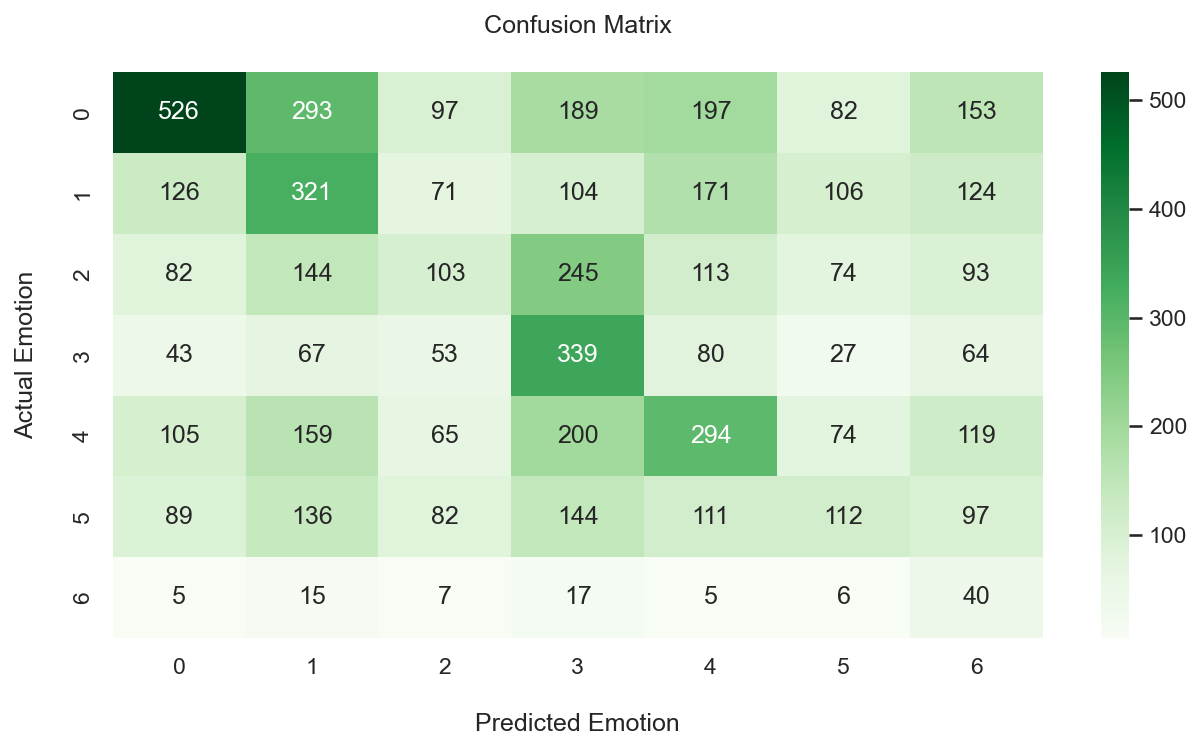

In [17]:
cf_matrix_GB = confusion_matrix(y_test, preds_gb)
ax = sns.heatmap(cf_matrix_GB, annot=True, fmt=".0f", cmap='Greens')
ax.set_title('Confusion Matrix\n')
ax.set_xlabel('\nPredicted Emotion')
ax.set_ylabel('Actual Emotion\n')
plt.savefig('gb_cf.png', bbox_inches='tight')
plt.show()

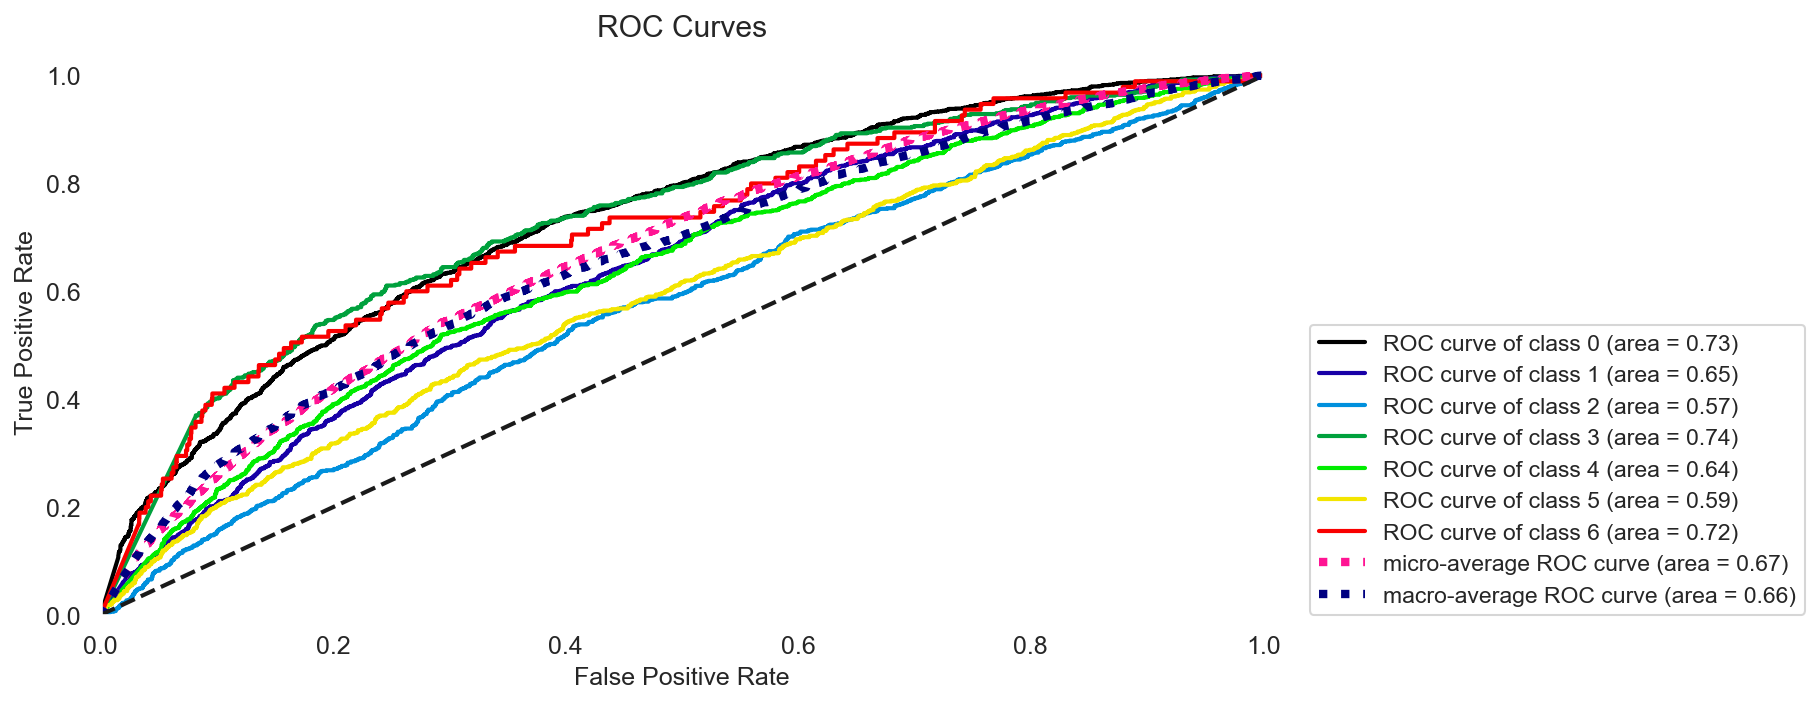

In [18]:
gb_roc_score = roc_auc_score(y_test, proba_valid_gb, multi_class='ovr').astype(float)
skplt.metrics.plot_roc_curve(y_test, proba_valid_gb)
plt.legend(loc=(1.04,0))
plt.savefig('gb_roc.png', bbox_inches='tight')
plt.show()

# <div style="color:#232F3E;display:fill;border-radius:5px;background-color:#CC6C6C;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:#232F3E;overflow:hidden;margin:0;font-size:110%"><b>9 |</b>  Multilayer Percepton Classifier</p></div>

In [19]:
mlp = MLPClassifier(hidden_layer_sizes=(100,50,25), max_iter=25, alpha=0.1,solver='sgd', verbose=0,random_state=21,tol=0.0000001)
mlp.fit(X_train, y_train)
preds_mlp = mlp.predict(X_test)
proba_valid_mlp = mlp.predict_proba(X_test)
print(f'\n\033[1;30;34m Training Accuracy   : \033[0;0m {(mlp.score(X_train, y_train)*100).round(2)}%')
print(f'\033[1;30;34m Testing Accuracy    : \033[0;0m {(mlp.score(X_test, y_test)*100).round(2)}%')


 Training Accuracy   :  42.27%
 Testing Accuracy    :  39.87%


In [20]:
classificationReportMLP = classification_report(y_test,  preds_mlp)
print(classificationReportMLP)

              precision    recall  f1-score   support

           0       0.47      0.75      0.58      1537
           1       0.31      0.22      0.26      1023
           2       0.30      0.14      0.19       854
           3       0.46      0.47      0.46       673
           4       0.36      0.42      0.39      1016
           5       0.29      0.19      0.23       771
           6       0.00      0.00      0.00        95

    accuracy                           0.40      5969
   macro avg       0.31      0.31      0.30      5969
weighted avg       0.37      0.40      0.37      5969



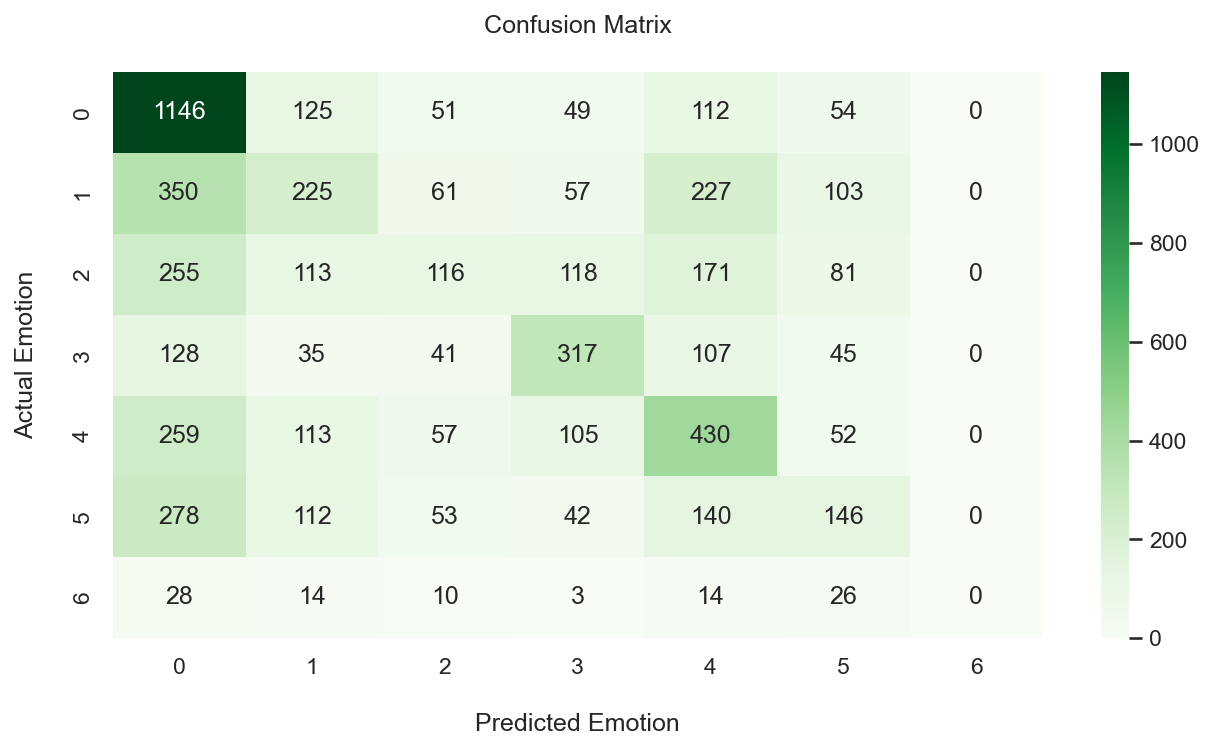

In [21]:
cf_matrix_MLP = confusion_matrix(y_test, preds_mlp)
ax = sns.heatmap(cf_matrix_MLP, annot=True, fmt=".0f", cmap='Greens')
ax.set_title('Confusion Matrix\n')
ax.set_xlabel('\nPredicted Emotion')
ax.set_ylabel('Actual Emotion\n')
plt.savefig('mlp_cf.png', bbox_inches='tight')
plt.show()

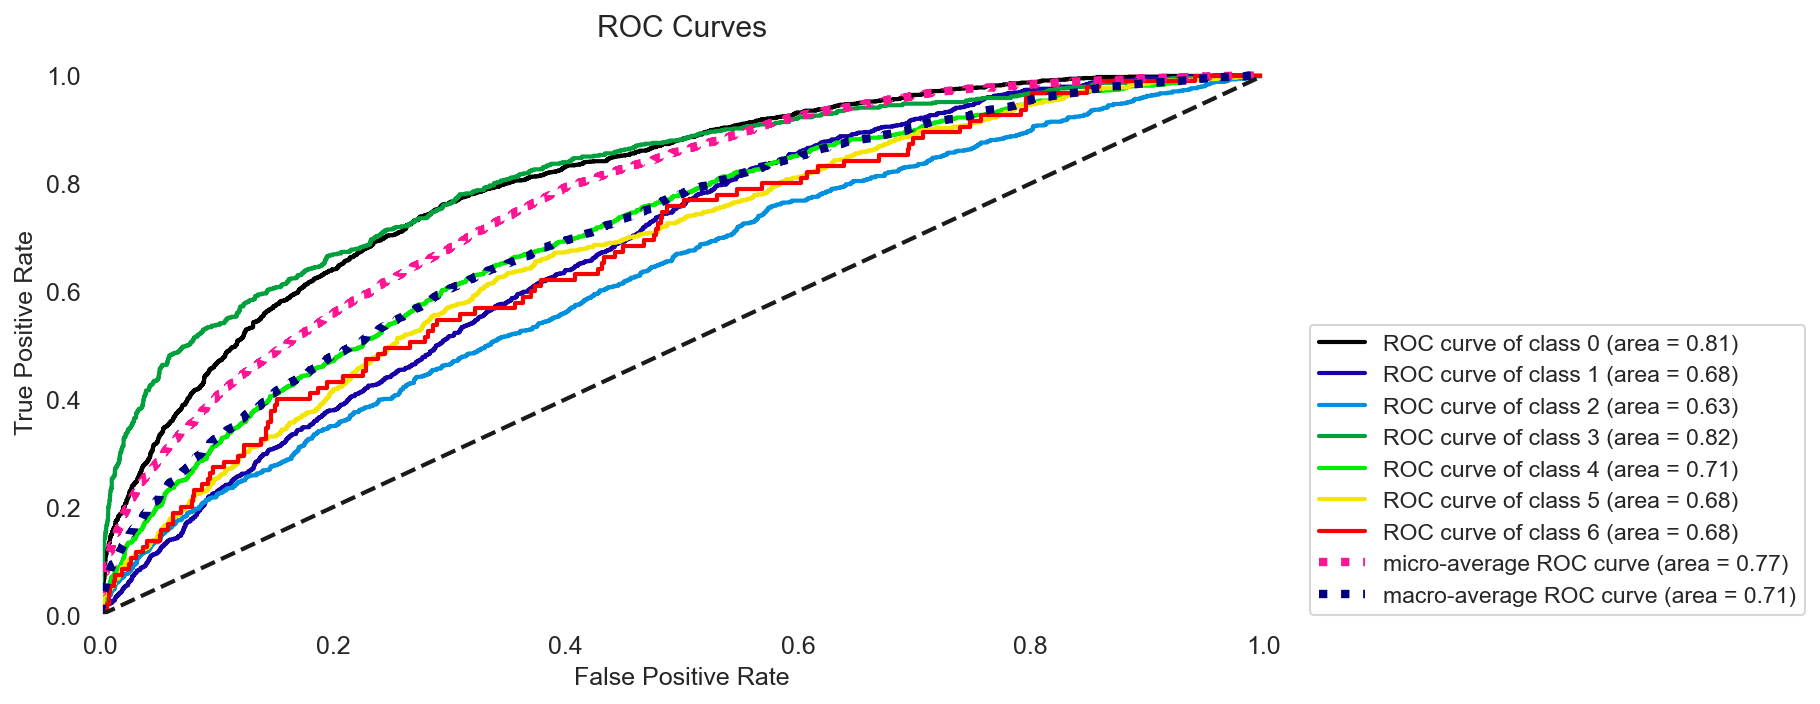

In [22]:
mlp_roc_score = roc_auc_score(y_test, proba_valid_mlp, multi_class='ovr').astype(float)
skplt.metrics.plot_roc_curve(y_test, proba_valid_mlp)
plt.legend(loc=(1.04,0))
plt.savefig('mlp_roc.png', bbox_inches='tight')
plt.show()

# <div style="color:#232F3E;display:fill;border-radius:5px;background-color:#CC6C6C;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:#232F3E;overflow:hidden;margin:0;font-size:110%"><b>10 |</b>  Cross Validation</p></div>

In [23]:
# Let's implement simple classifiers
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNN-Classifier": KNeighborsClassifier(),
    "GaussianNB": make_pipeline(QuantileTransformer(output_distribution='normal'), GaussianNB()),
    "MLP-Classifier": MLPClassifier(hidden_layer_sizes=(100,50,25), max_iter=25, alpha=0.1,solver='sgd', verbose=0,random_state=21,tol=0.0000001)
}
# Wow our scores are getting even high scores even when applying cross validation.
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train,cv=10,error_score="raise").mean() * 100
    print("Classifier: ", classifier.__class__.__name__, "Has a Training score of", round(training_score, 2), "% accuracy Score")

Classifier:  LogisticRegression Has a Training score of 37.35 % accuracy Score
Classifier:  KNeighborsClassifier Has a Training score of 39.39 % accuracy Score
Classifier:  Pipeline Has a Training score of 29.2 % accuracy Score
Classifier:  MLPClassifier Has a Training score of 38.42 % accuracy Score


# <div style="color:#232F3E;display:fill;border-radius:5px;background-color:#CC6C6C;letter-spacing:0.5px;overflow:hidden"><p style="padding:20px;color:#232F3E;overflow:hidden;margin:0;font-size:110%"><b>11 |</b>  Hyper-Parameter Tuning</p></div>

In [ ]:
# Use GridSearchCV to find the best parameters.
lr = LogisticRegression()
search_grid_lr = {
    'penalty':['l1','l2'] ,
    'C':[0.001, 0.01, 0.1, 1, 10, 100], 
    'solver': ['liblinear']
}
search_lr_pram =  GridSearchCV(estimator=lr, param_grid = search_grid_lr,cv=5)
search_lr_pram.fit(X_train, y_train)
search_lr_pram.best_params_

In [ ]:
# decission_tree_classifier_model = DecisionTreeClassifier()
# decission_tree_classifier_model.fit(X_train, y_train)
# y_pred_dt = decission_tree_classifier_model.predict(X_test)
# y_pred_proba_dt = decission_tree_classifier_model.predict_proba(X_test)
# print(f'\n\033[1;30;34m Training Accuracy   : \033[0;0m {(decission_tree_classifier_model.score(X_train, y_train)*100).round(2)}%')
# print(f'\033[1;30;34m Testing Accuracy    : \033[0;0m {(decission_tree_classifier_model.score(X_test, y_test)*100).round(2)}%')

# svc_classifier = SVC()
# svc_classifier.fit(X_train, y_train)
# y_pred_svc = svc_classifier.predict(X_test)
# y_pred_proba_svc = svc_classifier.predict_proba(X_test)
# print(f'\n\033[1;30;34m Training Accuracy   : \033[0;0m {(svc_classifier.score(X_train, y_train)*100).round(2)}%')
# print(f'\033[1;30;34m Testing Accuracy    : \033[0;0m {(svc_classifier.score(X_test, y_test)*100).round(2)}%')